## Feature Importance with Random Forest Regressor

### Import Packages

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from mlxtend.frequent_patterns import apriori
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

plt.rcParams["figure.figsize"] = (40,25)

### Import Data

In [2]:
df = pd.io.parsers.read_csv('Transactions.csv', dtype={'ACCT_NUM':'str',
                                                       'MO_NUM':'str',
                                                       'ZIP_CODE': 'str'})
df.head()

,ACCT_NUM,MO_NUM,ORG_NAME,SHARE_CLASS,TRANSACTION_CLASS,COMP_TYPE,TRANSACTION_TYPE,AMOUNT,ZIP_CODE,CLIENT_SEGMENT,ADVISOR_CLASS
0,1000126,201701,Lincoln Financial Advisors Corporation,U1,Retail,Commissions,Exchange In,14374899,60565,Cross Channel,Home Office
1,1000126,201701,Wells Fargo Advisors Private Client Group,R-6,Retail,Percent AUM,Redemption,41360988,92016,Retirement Plan,Team
2,1000124,201701,Merrill Lynch Pierce Fenner and Smith Inc,A,Insurance,Commissions,Sales,72848968,60565,Cross Channel,Team
3,1000122,201701,Morgan Stanley Smith Barney LLC,R-1,Retail,Performance Based,Sales,86306659,90210,Retirement Plan,Team
4,1000121,201701,Wells Fargo Advisors Private Client Group,A,Insurance,Fixed Fee,Exchange In,22503066,90210,Financial Conglomerate,Rep


#### Data Exploration

In [3]:
headers = df.columns.values
print(len(headers))

11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 11 columns):
ACCT_NUM             2834 non-null object
MO_NUM               2834 non-null object
ORG_NAME             2834 non-null object
SHARE_CLASS          2834 non-null object
TRANSACTION_CLASS    2834 non-null object
COMP_TYPE            2834 non-null object
TRANSACTION_TYPE     2834 non-null object
AMOUNT               2834 non-null int64
ZIP_CODE             2834 non-null object
CLIENT_SEGMENT       2834 non-null object
ADVISOR_CLASS        2834 non-null object
dtypes: int64(1), object(10)
memory usage: 243.6+ KB


In [5]:
df.describe()

,AMOUNT
count,2.834000e+03
mean,5.093286e+07
std,2.855644e+07
min,1.033442e+06
25%,2.625079e+07
50%,5.117281e+07
75%,7.614849e+07
max,9.996835e+07


### Data Preprocessing

In [7]:
preprocess_columns = ['SHARE_CLASS', 'TRANSACTION_CLASS', 'ZIP_CODE', 'CLIENT_SEGMENT',
                      'ACCT_NUM','MO_NUM',  'COMP_TYPE', 'TRANSACTION_TYPE', 'ADVISOR_CLASS' ] # ORG_NAME

In [8]:
prep_df = df[preprocess_columns]
prep_dummies_df = pd.get_dummies(prep_df)
prep_dummies_df.head()

,SHARE_CLASS_A,SHARE_CLASS_F-1,SHARE_CLASS_F-2,SHARE_CLASS_R-1,SHARE_CLASS_R-2,SHARE_CLASS_R-6,SHARE_CLASS_U1,SHARE_CLASS_U2,TRANSACTION_CLASS_Institutional,TRANSACTION_CLASS_Insurance,...,COMP_TYPE_Fixed Fee,COMP_TYPE_Percent AUM,COMP_TYPE_Performance Based,TRANSACTION_TYPE_Exchange In,TRANSACTION_TYPE_Exchange Out,TRANSACTION_TYPE_Redemption,TRANSACTION_TYPE_Sales,ADVISOR_CLASS_Home Office,ADVISOR_CLASS_Rep,ADVISOR_CLASS_Team
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,1,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0


In [9]:
prep_dummies_df['AMOUNT'] = df['AMOUNT']

In [10]:
target = prep_dummies_df['AMOUNT']
features = prep_dummies_df.drop('AMOUNT', axis=1)

In [11]:
scaler = StandardScaler()

scaled_features = scaler.fit_transform(features)

C:\Users\alexcheng2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\alexcheng2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=0)

### Random Forest Regression

In [13]:
clf = RandomForestRegressor()

clf.fit(X_train, y_train)

C:\Users\alexcheng2\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
# Prediction score (out of 100)
clf.score(X_test, y_test)

-0.16087532192011245

### Feature Importance

In [32]:
#sorted(zip(clf.feature_importances_, features.columns.values), reverse=True)

In [28]:
feature_importances = clf.feature_importances_
headers = features.columns.values

data = {"Features":headers, "Feature Importances":feature_importances}

features_df = pd.DataFrame(data, columns=['Features', 'Feature Importances'])
features_df = features_df.sort_values(by='Feature Importances', ascending=False).reset_index(drop=True)

In [33]:
features_df.head()

,Features,Feature Importances
0,TRANSACTION_TYPE_Exchange Out,0.024918
1,ZIP_CODE_92016,0.024374
2,ADVISOR_CLASS_Rep,0.024203
3,ADVISOR_CLASS_Team,0.023447
4,CLIENT_SEGMENT_Cross Channel,0.023014


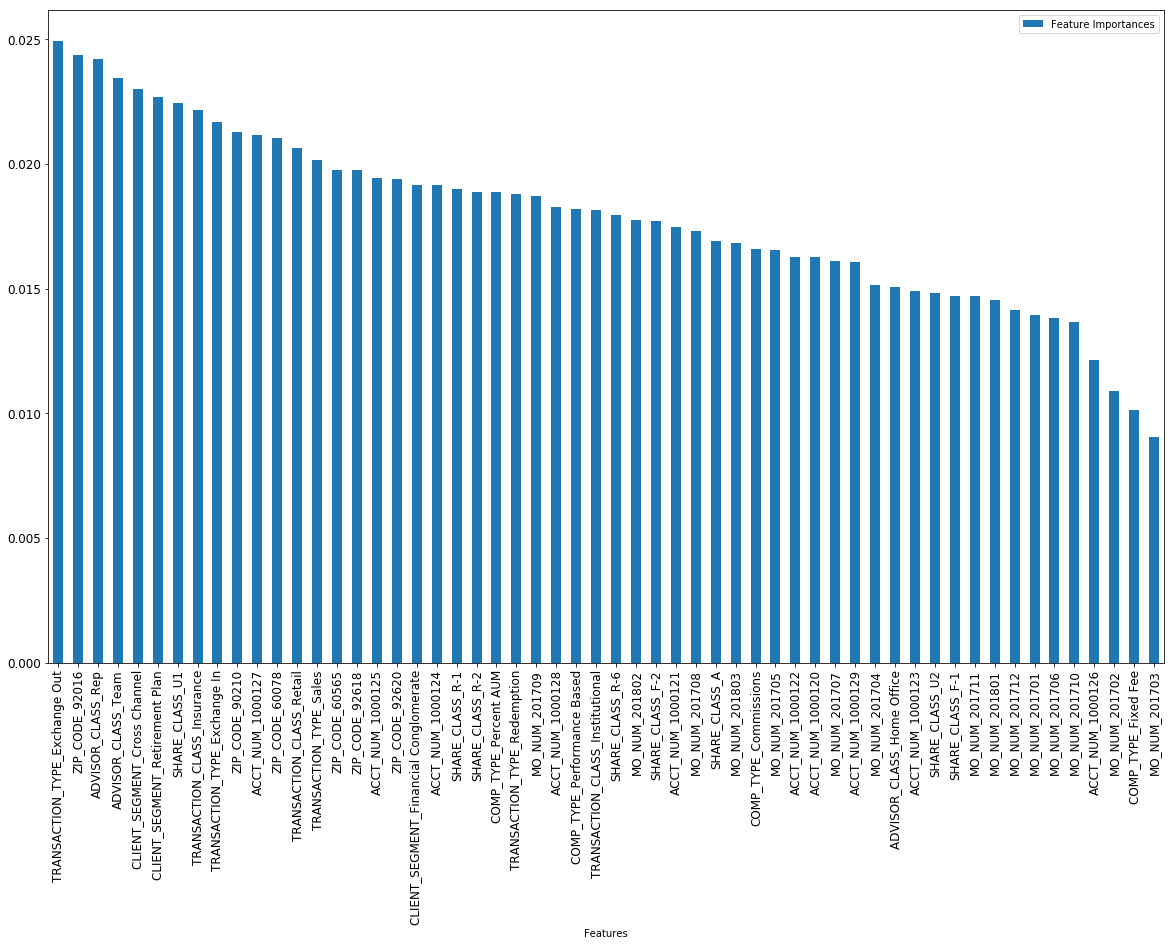

In [36]:
features_df.plot(x='Features', kind='bar', figsize=(20,12), fontsize=12)